In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

## Candidate Data for 2018


In [317]:
fed = pd.read_csv('weball18.csv', sep='|')
fed.describe()

,PTY_CD,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,...,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,INDIV_REFUNDS,CMTE_REFUNDS
count,3690.000000,3.690000e+03,3.690000e+03,3.690000e+03,3.690000e+03,3.690000e+03,3.690000e+03,3.690000e+03,3.690000e+03,3.690000e+03,...,3689.000000,0.0,0.0,0.0,0.0,0.0,3.690000e+03,3690.000000,3.690000e+03,3.690000e+03
mean,1.611924,8.733092e+05,5.517073e+04,8.502817e+05,4.559256e+03,1.377795e+05,1.610315e+05,3.702531e+04,7.058936e+04,2.338062e+03,...,8.334508,NaN,NaN,NaN,NaN,NaN,1.456516e+05,930.112488,1.519700e+04,2.543013e+03
std,0.644487,3.590054e+06,6.478155e+05,3.517653e+06,5.657233e+04,6.058094e+05,7.548103e+05,1.104639e+06,7.641854e+05,6.214175e+04,...,10.598587,NaN,NaN,NaN,NaN,NaN,3.886482e+05,6833.979140,9.355194e+04,2.892582e+04
min,1.000000,-3.644147e+04,0.000000e+00,-1.268564e+04,0.000000e+00,-5.330167e+04,-5.330167e+04,0.000000e+00,-5.000000e+04,0.000000e+00,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,-3.544889e+05,-2.500000e+03
25%,1.000000,9.529125e+02,0.000000e+00,3.373988e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2.000000,3.631532e+04,0.000000e+00,4.270738e+04,0.000000e+00,0.000000e+00,3.093050e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,2.000000,5.484343e+05,0.000000e+00,5.353357e+05,0.000000e+00,5.854290e+03,1.549432e+04,5.000000e+02,2.439250e+03,0.000000e+00,...,11.000000,NaN,NaN,NaN,NaN,NaN,1.593750e+04,0.000000,3.249387e+03,0.000000e+00
max,3.000000,8.523172e+07,3.510289e+07,8.377111e+07,2.250400e+06,1.500000e+07,1.929290e+07,6.356975e+07,3.600000e+07,3.500000e+06,...,53.000000,NaN,NaN,NaN,NaN,NaN,3.414659e+06,303816.220000,3.449915e+06,1.025588e+06


In [318]:
## Clean up
dup_cols = ['TTL_RECEIPTS', 'TRANS_FROM_AUTH', 'TTL_DISB', 
            'COH_BOP', 'COH_COP', 'CAND_CONTRIB', 'CAND_LOANS', 
            'OTHER_LOANS', 'CAND_LOAN_REPAY', 'OTHER_LOAN_REPAY', 
            'DEBTS_OWED_BY', 'TTL_INDIV_CONTRIB', 'OTHER_POL_CMTE_CONTRIB',
            'CAND_OFFICE_ST',
            'CAND_PTY_AFFILIATION', 'CVG_END_DT']

# Remove some duplicates
# print(fed[fed.duplicated(subset=dup_cols)])
dedup_fed = fed.drop_duplicates(subset=dup_cols).copy()

# Split name
dedup_fed[
    ['LAST_NAME', 'FIRST_NAME', 'SP_TITLE']
] = dedup_fed['CAND_NAME'].str.lower().str.replace('jr.', '').str.split(pat=',', expand=True)
# dedup_fed['FIRST_NAME'] = dedup_fed['FIRST_NAME'].str.split()

dedup_fed['first'] = dedup_fed['FIRST_NAME'].str.split(expand=True)[0]
dedup_fed['last_reverse'] = dedup_fed.loc[:,'LAST_NAME'].apply(lambda x: x[::-1])

dedup_fed['JOIN_NAME'] = dedup_fed['FIRST_NAME'].str.cat(dedup_fed['LAST_NAME'], sep=" ").str.lower().str.strip()
dedup_fed['join_key2'] = dedup_fed['first'].str.cat(dedup_fed['last_reverse'], sep="").str.lower().str.strip()

In [321]:
pos_cont = dedup_fed[dedup_fed['TTL_RECEIPTS'] > 0]

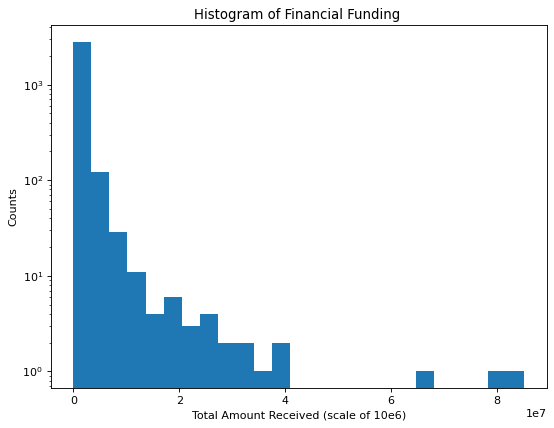

In [322]:
bins=25
plt.figure(figsize=(8, 6), dpi=80)
plt.yscale('log')
plt.hist(pos_cont['TTL_RECEIPTS'], bins)
plt.xlabel('Total Amount Received (scale of 10e6)')
plt.ylabel('Counts')
plt.title('Histogram of Financial Funding ')
plt.show()

## Democrats

In [323]:
dems = pd.read_csv('dem_candidates.csv')
dems = dems[dems['Office Type'] != 'Governor']
dems['mod_cand'] = dems['Candidate'].str.lower().str.replace('jr.', '')
dems['first'] = dems['mod_cand'].str.split(expand=True)[0]
dems['last_reverse'] = dems.loc[:,'mod_cand'].apply(lambda x: x[::-1]).str.split(expand=True)[0]

dems['JOIN_NAME'] = dems['Candidate'].str.lower().str.strip()
# merged_dems = pd.merge(dems, dedup_fed, how='left', left_on = 'JOIN_NAME', right_on = 'JOIN_NAME')

dems['join_key2'] = dems['first'].str.cat(dems['last_reverse'], sep="").str.strip()
merged_dems = pd.merge(dems, dedup_fed, how='left', left_on = 'join_key2', right_on = 'join_key2')

In [328]:
# merged_dems[merged_dems['LAST_NAME'].isna()]

In [341]:
clean_merged_dems = merged_dems.dropna(axis=0, subset=['FIRST_NAME'])
temp_cols = ['mod_cand', 'first_x', 'last_reverse_x', 'join_key2', 'JOIN_NAME_x', 'first_y', 'last_reverse_y', 'JOIN_NAME_y']

clean_merged_dems = clean_merged_dems.drop(temp_cols, axis = 1)
clean_merged_dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,LAST_NAME,FIRST_NAME,SP_TITLE
0,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Lost,None,None,-30.680000,...,NaN,NaN,0.0,0.0,06/30/2018,0.00,0.0,mcconnell,lizzetta hill,None
1,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,7750.0,0.0,12/31/2018,0.00,0.0,kennedy,robert,None
2,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,0.0,0.0,12/31/2017,14.00,0.0,kennedy,robert jr,None
3,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Lost,None,None,-33.080002,...,NaN,NaN,0.0,0.0,06/30/2018,0.00,0.0,williams,audri scott 1955,None
4,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.080002,...,NaN,NaN,8605.0,0.0,12/31/2018,4796.05,1000.0,isner,tabitha kay,None


In [342]:
clean_merged_dems.to_csv('merged_dems.csv', index=False)

## Republicans

In [348]:
reps = pd.read_csv('rep_candidates.csv')
reps = reps[reps['Office Type'] != 'Governor']
reps['mod_cand'] = reps['Candidate'].str.lower().str.replace('jr.', '')
reps['first'] = reps['mod_cand'].str.split(expand=True)[0]
reps['last_reverse'] = reps.loc[:,'mod_cand'].apply(lambda x: x[::-1]).str.split(expand=True)[0]

reps['JOIN_NAME'] = reps['Candidate'].str.lower().str.strip()
# merged_dems = pd.merge(dems, dedup_fed, how='left', left_on = 'JOIN_NAME', right_on = 'JOIN_NAME')

reps['join_key2'] = reps['first'].str.cat(reps['last_reverse'], sep="").str.strip()
merged_reps = pd.merge(reps, dedup_fed, how='left', left_on = 'join_key2', right_on = 'join_key2')

In [349]:
merged_reps[merged_reps['LAST_NAME'].isna()]

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,LAST_NAME,FIRST_NAME,SP_TITLE,first_y,last_reverse_y,JOIN_NAME_y
3,Lea Marquez Peterson,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Advanced,None,On the Ballot,33.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Danny Morales,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Lost,None,None,15.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Edna San Miguel,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Lost,None,None,21.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Nicolas Pierson,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Advanced,None,On the Ballot,51.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Clair Van Steenwyk,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,2.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Stephen Dolgos,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Mark Yates,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,1.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Dave Giles,AZ,U.S. House Arizona District 9,Representative,Regular,8/28/18,Lost,None,None,33.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Irina Baroness Von Behr,AZ,U.S. House Arizona District 9,Representative,Regular,8/28/18,Lost,None,None,7.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,John Fitzgerald,CA,U.S. House California District 11,Representative,Regular,6/5/18,Advanced,None,On the Ballot,100.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
clean_merged_reps = merged_reps.dropna(axis=0, subset=['FIRST_NAME'])
temp_cols = ['mod_cand', 'first_x', 'last_reverse_x', 'join_key2', 'JOIN_NAME_x', 'first_y', 'last_reverse_y', 'JOIN_NAME_y']

clean_merged_reps = clean_merged_reps.drop(temp_cols, axis = 1)
clean_merged_reps

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,LAST_NAME,FIRST_NAME,SP_TITLE
0,Steve Smith,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Lost,None,None,37.80,...,NaN,NaN,30500.00,0.00,12/31/2018,75150.00,1000.00,smith,steve,None
1,Wendy Rogers,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Advanced,None,On the Ballot,43.40,...,NaN,NaN,83750.00,5000.00,12/31/2018,6300.00,0.00,rogers,wendy,None
2,Tiffany Shedd,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Lost,None,None,18.80,...,NaN,NaN,59752.63,0.00,12/31/2018,31800.00,5000.00,shedd,tiffany,None
4,Casey Welch,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Lost,None,None,21.40,...,NaN,NaN,0.00,0.00,10/30/2018,0.00,0.00,welch,casey burke mr.,None
6,Brandon Martin,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Lost,None,None,29.10,...,NaN,NaN,0.00,0.00,12/31/2018,50.00,0.00,martin,brandon ray,None
8,Sergio Arellano,AZ,U.S. House Arizona District 3,Representative,Regular,8/28/18,Lost,None,None,27.30,...,NaN,NaN,0.00,0.00,12/31/2018,0.00,0.00,arellano,sergio,None
10,Debbie Lesko,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Advanced,None,On the Ballot,35.77,...,NaN,NaN,543415.08,20000.00,12/31/2018,2345.00,0.00,lesko,debbie,None
11,Bob Stump,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,5.37,...,NaN,NaN,0.00,0.00,12/31/2018,0.00,0.00,stump,bob,None
13,Phil Lovas,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,23.88,...,NaN,NaN,15250.00,0.00,03/31/2018,5400.00,0.00,lovas,phil,None
14,Richard Mack,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,1.42,...,NaN,NaN,0.00,0.00,03/31/2018,0.00,0.00,mack,richard,None
